# Project One - Cumulative Return Visualization/test portfolio based on DCF model


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from datetime import datetime 
import pandas_datareader.data as web
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

style.use('ggplot')

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/brennanseanm/Jupyter-Workspace/.env")

True

## Part 1 - Pull in data using Alpaca to prove/test proof of concept

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
#Set the start and end date to prepare pulling stock date for up to 5 years
start_date = pd.Timestamp('2018-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [5]:
#Set the tickers in a Test portfolio based on stock selection given our DCF results to see if a stock is under or over valued

tickers = ['AMZN', 'FB', 'BABA', 'NFLX']
timeframe = "1D"

#portfolio_df = web.DataReader(tickers, data_source='yahoo', start='2017-01-01', end='2020-09-28')

# Get 5 years' worth of historical data from Aplaca for us in the MC simulation
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data in the data frame created from DCF stock picking solution
df_stock_data.dropna()
df_stock_data.head()

AMZN                                      \
                              open     high      low    close   volume   
time                                                                     
2018-03-19 00:00:00-04:00  1554.53  1561.66  1525.35  1545.58  3884291   
2018-03-20 00:00:00-04:00  1548.40  1587.00  1545.41  1586.52  2782441   
2018-03-21 00:00:00-04:00  1586.45  1590.00  1563.17  1582.93  3029009   
2018-03-22 00:00:00-04:00  1565.47  1573.85  1542.40  1544.92  3566700   
2018-03-23 00:00:00-04:00  1539.01  1549.02  1495.36  1495.55  4669265   

                             BABA                                         FB  \
                             open    high      low   close    volume    open   
time                                                                           
2018-03-19 00:00:00-04:00  198.00  198.43  192.801  194.50  14966073  177.01   
2018-03-20 00:00:00-04:00  194.95  199.21  194.540  199.01   9413403  167.41   
2018-03-21 00:00:00-04:00  198.80  198.88  194.570  195.30   9684561  164.70   
2018-03-22 00:00:00-04:00  190.75  192.39  184.600  184.66  20433355  166.13   
2018-03-23 00:00:00-04:00  186.85  188.48  180.401  181.13  14631818  165.43   

                                                                    NFLX  \
                             high     low     close       volume    open   
time                                                                       
2018-03-19 00:00:00-04:00  177.17  170.06  172.5700   74141107.0  315.80   
2018-03-20 00:00:00-04:00  170.20  161.95  168.1400  112442583.0  313.31   
2018-03-21 00:00:00-04:00  173.40  163.30  169.4492   92975524.0  316.35   
2018-03-22 00:00:00-04:00  170.27  163.72  164.9100   63001285.0  312.99   
2018-03-23 00:00:00-04:00  167.10  159.02  159.3500   43425065.0  307.55   

                                                             
                             high      low   close   volume  
time                                                         
2018-03-19 00:00:00-04:00  317.00  307.340  313.48  6642500  
2018-03-20 00:00:00-04:00  319.50  312.800  317.50  4318120  
2018-03-21 00:00:00-04:00  319.40  314.511  316.43  3453103  
2018-03-22 00:00:00-04:00  314.12  305.660  306.63  5575022  
2018-03-23 00:00:00-04:00  310.73  300.360  300.94  6467855

## Part 2: Create dataframe and set up for MonteCarlo simulation to analyze future returns to see if we can beat the SP500

In [16]:
# Configuring a Monte Carlo simulation to forecast for one year cumulative returns
num_sims = 500

MC_oneyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25,.25,.25, .25],
    num_simulation = num_sims,
    num_trading_days = 252*1
)

In [17]:
# Printing the simulation input data
MC_oneyear.portfolio_data.head()

AMZN                                      \
                              open     high      low    close   volume   
time                                                                     
2018-03-19 00:00:00-04:00  1554.53  1561.66  1525.35  1545.58  3884291   
2018-03-20 00:00:00-04:00  1548.40  1587.00  1545.41  1586.52  2782441   
2018-03-21 00:00:00-04:00  1586.45  1590.00  1563.17  1582.93  3029009   
2018-03-22 00:00:00-04:00  1565.47  1573.85  1542.40  1544.92  3566700   
2018-03-23 00:00:00-04:00  1539.01  1549.02  1495.36  1495.55  4669265   

                                          BABA                           ...  \
                          daily_return    open    high      low   close  ...   
time                                                                     ...   
2018-03-19 00:00:00-04:00          NaN  198.00  198.43  192.801  194.50  ...   
2018-03-20 00:00:00-04:00     0.026488  194.95  199.21  194.540  199.01  ...   
2018-03-21 00:00:00-04:00    -0.002263  198.80  198.88  194.570  195.30  ...   
2018-03-22 00:00:00-04:00    -0.024012  190.75  192.39  184.600  184.66  ...   
2018-03-23 00:00:00-04:00    -0.031956  186.85  188.48  180.401  181.13  ...   

                               FB                                        NFLX  \
                              low     close       volume daily_return    open   
time                                                                            
2018-03-19 00:00:00-04:00  170.06  172.5700   74141107.0          NaN  315.80   
2018-03-20 00:00:00-04:00  161.95  168.1400  112442583.0    -0.025671  313.31   
2018-03-21 00:00:00-04:00  163.30  169.4492   92975524.0     0.007786  316.35   
2018-03-22 00:00:00-04:00  163.72  164.9100   63001285.0    -0.026788  312.99   
2018-03-23 00:00:00-04:00  159.02  159.3500   43425065.0    -0.033715  307.55   

                                                                          
                             high      low   close   volume daily_return  
time                                                                      
2018-03-19 00:00:00-04:00  317.00  307.340  313.48  6642500          NaN  
2018-03-20 00:00:00-04:00  319.50  312.800  317.50  4318120     0.012824  
2018-03-21 00:00:00-04:00  319.40  314.511  316.43  3453103    -0.003370  
2018-03-22 00:00:00-04:00  314.12  305.660  306.63  5575022    -0.030971  
2018-03-23 00:00:00-04:00  310.73  300.360  300.94  6467855    -0.018557  

[5 rows x 24 columns]

In [18]:
# Monte Carlo Simulation setup
MC_oneyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988929,0.997324,0.996896,1.001431,0.998979,1.015171,1.022917,0.995482,1.005444,0.996399,...,1.000570,1.004246,1.010413,0.990793,0.981708,0.991367,0.983504,1.007518,1.002818,1.014112
2,0.996161,1.004471,0.991242,1.004490,1.004455,1.041749,1.011071,0.991430,1.014708,0.972340,...,1.010349,1.003997,1.026790,0.993379,0.973892,1.005213,0.983564,1.011559,0.995055,1.000815
3,0.991116,1.012789,0.997648,1.018060,0.990968,1.035023,1.015065,0.999221,1.061357,0.971904,...,1.020253,1.004998,1.025398,1.009330,0.974377,1.000450,1.008357,0.999099,0.994434,0.967881
4,0.991489,1.023402,1.007600,1.019142,0.989464,1.027092,1.011932,1.015031,1.087398,0.979297,...,0.998735,1.010537,1.027927,1.023022,0.964500,0.996744,1.020113,1.000811,1.023051,0.953492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.294491,0.941997,1.092746,1.488673,1.158447,1.318117,1.284068,1.175234,1.396820,1.413497,...,1.031021,1.257318,1.356819,1.117138,1.115715,1.242868,1.483671,1.405410,1.131045,1.252003
249,1.263698,0.935844,1.073408,1.482105,1.167426,1.310152,1.297425,1.187580,1.403145,1.450573,...,1.001855,1.242394,1.350229,1.114342,1.132717,1.233295,1.519692,1.401928,1.123241,1.277755
250,1.260240,0.934978,1.079306,1.455022,1.170035,1.327316,1.306272,1.188305,1.398753,1.465661,...,1.008300,1.276748,1.338873,1.102510,1.137866,1.212742,1.525641,1.434046,1.118582,1.289573
251,1.287427,0.947229,1.085011,1.484004,1.168726,1.330548,1.314301,1.202546,1.423730,1.438327,...,1.011382,1.293282,1.331294,1.124857,1.121195,1.238308,1.542220,1.437492,1.149359,1.294559


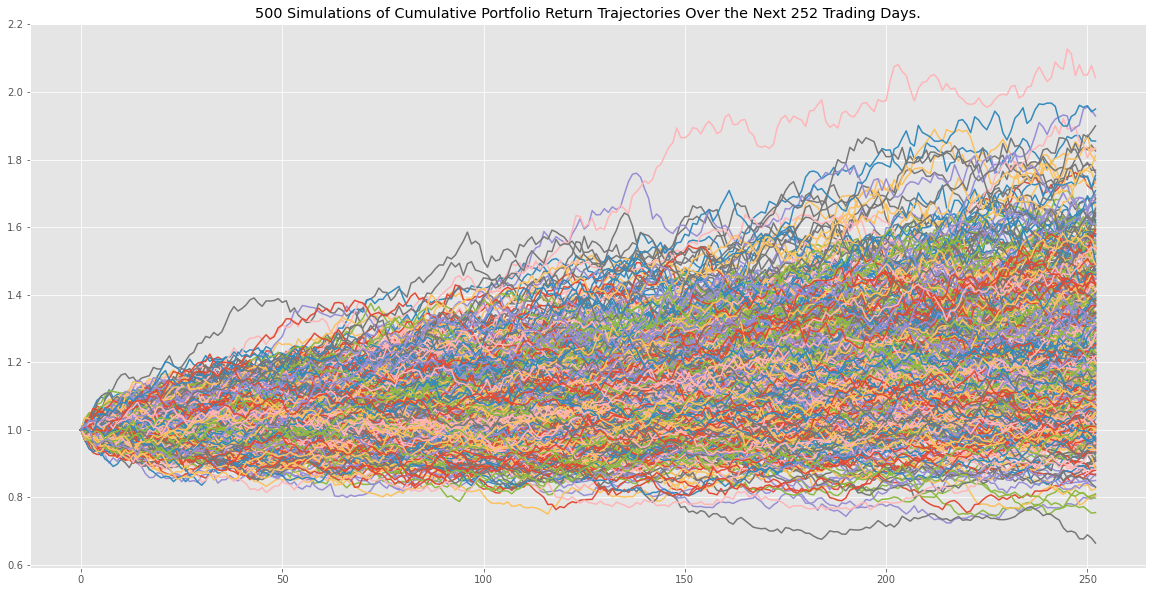

In [19]:
# Plot simulation outcomes
line_plot_oneyear = MC_oneyear.plot_simulation()

# Save the plot for future usage
line_plot_oneyear.get_figure().savefig("MC_oneyear_sim_plot.png", bbox_inches="tight")

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_oneyear = MC_oneyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_oneyear)


count           500.000000
mean              1.259992
std               0.230836
min               0.665046
25%               1.088527
50%               1.231497
75%               1.410265
max               2.041920
95% CI Lower      0.874648
95% CI Upper      1.747576
Name: 252, dtype: float64


In [21]:
# Set initial investment
initial_investment_oneyear = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_oneyear = round(tbl_oneyear[8]*initial_investment_oneyear,2)
ci_upper_oneyear = round(tbl_oneyear[9]*initial_investment_oneyear,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_oneyear:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_oneyear:,.2f} and ${ci_upper_oneyear:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $17,492.95 and $34,951.53
